In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [83]:
df = sns.load_dataset("dowjones")
df.head()

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    649 non-null    datetime64[ns]
 1   Price   649 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.3 KB


In [85]:
df.shape


(649, 2)

In [86]:
df.isnull().sum()

Date     0
Price    0
dtype: int64

In [87]:
df.Date

0     1914-12-01
1     1915-01-01
2     1915-02-01
3     1915-03-01
4     1915-04-01
         ...    
644   1968-08-01
645   1968-09-01
646   1968-10-01
647   1968-11-01
648   1968-12-01
Name: Date, Length: 649, dtype: datetime64[ns]

In [88]:
df.duplicated().sum()

0

In [89]:
df.Price

0       55.00
1       56.55
2       56.00
3       58.30
4       66.45
        ...  
644    883.72
645    922.80
646    955.47
647    964.12
648    965.39
Name: Price, Length: 649, dtype: float64

In [90]:
df.describe()

,Date,Price
count,649,649.000000
mean,1941-11-30 17:42:48.258859776,290.807319
min,1914-12-01 00:00:00,46.850000
25%,1928-06-01 00:00:00,106.900000
50%,1941-12-01 00:00:00,172.270000
75%,1955-06-01 00:00:00,436.730000
max,1968-12-01 00:00:00,985.930000
std,NaN,256.062906


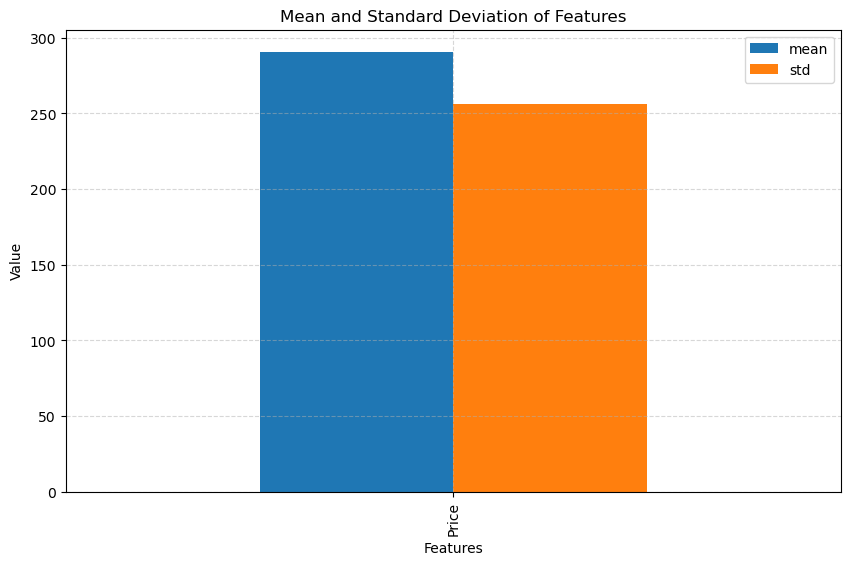

In [195]:
desc = df.describe().T  

desc[['mean', 'std']].plot(kind='bar', figsize=(10,6))
plt.title('Mean and Standard Deviation of Features')
plt.xlabel('Features')
plt.ylabel('Value')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [91]:
len(df.Price)

649

In [92]:
len(df.Date)

649

In [93]:
df.Date.value_counts()

Date
1914-12-01    1
1952-02-01    1
1950-08-01    1
1950-09-01    1
1950-10-01    1
             ..
1933-02-01    1
1933-03-01    1
1933-04-01    1
1933-05-01    1
1968-12-01    1
Name: count, Length: 649, dtype: int64

In [94]:
df.Price.value_counts()

Price
98.50     2
97.00     2
120.10    2
99.45     2
75.70     2
         ..
102.85    1
106.90    1
102.30    1
96.20     1
965.39    1
Name: count, Length: 637, dtype: int64

In [95]:
!pip install ydata-profiling

In [96]:
from ydata_profiling import ProfileReport

In [97]:
profile = ProfileReport(df , title = "DowJones Profiling Report" , explorative = True)

In [98]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 1639.36it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [99]:
profile.to_file("DowJones_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

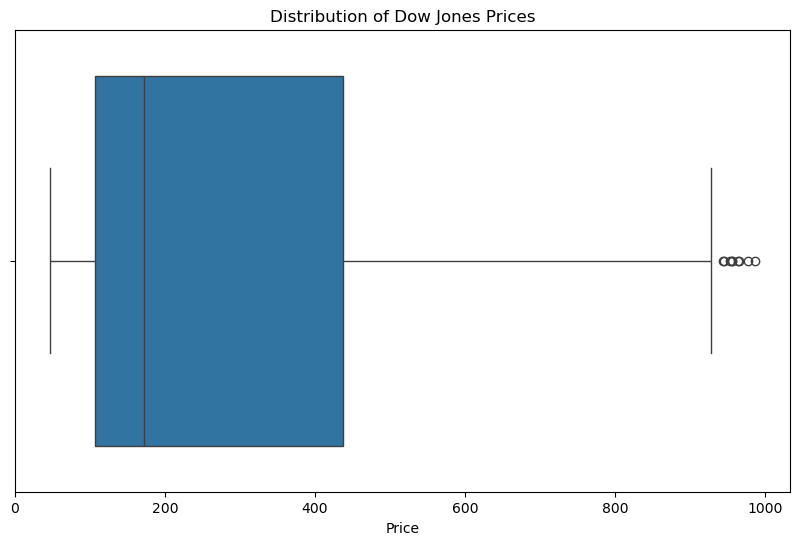

In [100]:
%matplotlib inline

fig = plt.figure(figsize=(10,6))
ax = fig.subplots()

sns.boxplot(x=df["Price"], ax=ax)
plt.title("Distribution of Dow Jones Prices")
plt.xlabel("Price")
plt.show()

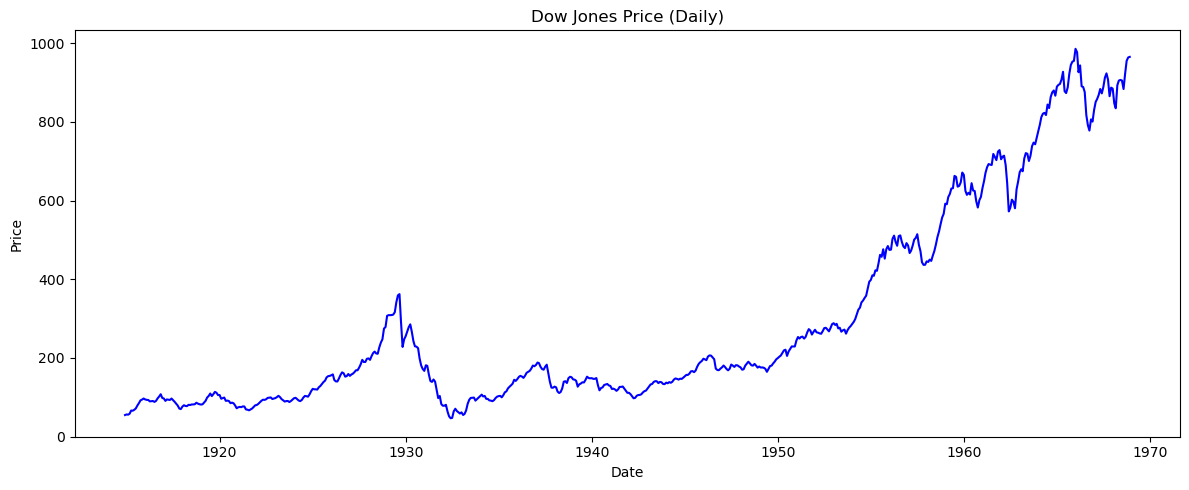

In [101]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(df['Date'], df['Price'], color='blue')
ax.set_title('Dow Jones Price (Daily)')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

In [102]:
df1 = df.copy()

In [103]:
df1['Price'].describe()

count    649.000000
mean     290.807319
std      256.062906
min       46.850000
25%      106.900000
50%      172.270000
75%      436.730000
max      985.930000
Name: Price, dtype: float64

In [104]:
q1 = df1['Price'].quantile(0.25)
q3 = df1['Price'].quantile(0.75)
print(q1,q3)

106.9 436.73


In [105]:
IQR = q3 - q1
print(IQR)

329.83000000000004


In [106]:
upper_limit = q3 +1.5 *IQR
lower_limit = q1 - 1.5 * IQR


In [107]:
upper_limit

931.4750000000001

In [108]:
lower_limit

-387.845

In [109]:
df1[df1['Price'] > upper_limit]

,Date,Price
610,1965-10-01,944.77
611,1965-11-01,953.31
612,1965-12-01,955.19
613,1966-01-01,985.93
614,1966-02-01,977.15
616,1966-04-01,943.70
646,1968-10-01,955.47
647,1968-11-01,964.12
648,1968-12-01,965.39


In [110]:
len(df1[df1['Price']  > upper_limit])

9

In [111]:
df1.shape

(649, 2)

In [112]:
df2 =df1[(df['Price'] > lower_limit) & (df1['Price'] < upper_limit)]

In [113]:
df2.shape

(640, 2)

In [114]:
df2.Price.value_counts()

Price
98.50     2
97.00     2
99.45     2
75.70     2
90.65     2
         ..
91.65     1
95.45     1
99.05     1
102.85    1
922.80    1
Name: count, Length: 628, dtype: int64

In [115]:
df2.columns


Index(['Date', 'Price'], dtype='object')

In [116]:
X =df2.drop(columns = ['Price'])

In [117]:
X.columns

Index(['Date'], dtype='object')

In [118]:
X =pd.get_dummies(X , drop_first = True).astype('int')

In [119]:
X.head()

,Date
0,-1738368000000000000
1,-1735689600000000000
2,-1733011200000000000
3,-1730592000000000000
4,-1727913600000000000


In [120]:
X.shape

(640, 1)

In [121]:
y = df2[['Price']]

In [122]:
y.columns

Index(['Price'], dtype='object')

In [123]:
y.shape

(640, 1)

In [124]:
from sklearn.model_selection import train_test_split as split

In [125]:
X_train , X_test , y_train , y_test = split(X,y , train_size = 0.8 , random_state = 42)

In [126]:
X_train.shape

(512, 1)

In [127]:
X_test.shape

(128, 1)

In [128]:
y_test.shape


(128, 1)

In [129]:
y_train.shape

(512, 1)

In [130]:
X.head()

,Date
0,-1738368000000000000
1,-1735689600000000000
2,-1733011200000000000
3,-1730592000000000000
4,-1727913600000000000


In [131]:
y.head()

,Price
0,55.00
1,56.55
2,56.00
3,58.30
4,66.45


In [132]:
X.columns

Index(['Date'], dtype='object')

In [133]:
y.columns

Index(['Price'], dtype='object')

In [134]:
X_test.head()

,Date
570,-239414400000000000
265,-1041379200000000000
291,-973209600000000000
597,-168307200000000000
174,-1280793600000000000


In [135]:
y_test.head()

,Price
570,572.64
265,182.30
291,142.05
597,863.55
174,316.45


In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
sc = StandardScaler()

In [138]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [139]:
X_train[:10]

array([[ 0.46501553],
       [-0.40327054],
       [ 0.57406695],
       [ 0.59038879],
       [ 0.79808871],
       [-0.77974906],
       [ 0.04997443],
       [ 0.86857754],
       [ 0.87951855],
       [ 1.50225957]])

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [141]:
df2 = df2.sort_values('Date').reset_index(drop=True)

In [142]:
df2['Pct_Change'] = df2['Price'].pct_change() * 100


In [143]:
df2['Next_Pct'] = df2['Pct_Change'].shift(-1)
df2['Target'] = (df2['Next_Pct'] > 0).astype(int)

In [144]:
df2 = df2.dropna()

In [145]:
X = df2[['Pct_Change']]
y = df2['Target']

In [146]:
X_train, X_test , y_train ,y_test = train_test_split(X ,  y , test_size = 0.2 , random_state = 42)

In [147]:
from sklearn.linear_model import LogisticRegression

In [148]:
model = LogisticRegression()

In [149]:
model.fit(X_train , y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [150]:
y_pred = model.predict(X_test)

In [151]:
df2 = df2.copy()

In [152]:
df2['MA_3'] = df2['Price'].rolling(3).mean()
df2['MA_7'] = df2['Price'].rolling(7).mean()
df2['Vol_5'] = df2['Pct_Change'].rolling(5).std()

df2 = df2.dropna()

X = df2[['Pct_Change', 'MA_3', 'MA_7', 'Vol_5']]
y = df2['Target']

In [153]:
df2['Return_1'] = df2['Price'].pct_change(1)
df2['Return_5'] = df2['Price'].pct_change(5)

# Trend indicators
df2['MA_10'] = df2['Price'].rolling(10).mean()
df2['MA_20'] = df2['Price'].rolling(20).mean()
df2['MA_Ratio'] = df2['MA_10'] / df2['MA_20']


df2['Vol_10'] = df2['Return_1'].rolling(10).std()

# Lag feature
df2['Lag_1'] = df2['Return_1'].shift(1)

In [154]:
features = ['Return_1', 'Return_5', 'MA_10', 'MA_20', 'MA_Ratio', 'Vol_10', 'Lag_1']
X = df2[features].dropna()
y = df2['Target'].loc[X.index]

In [155]:
accuracy = accuracy_score(y_test ,  y_pred)
print("Model Accuracy:" , round(accuracy * 100,2) , "%")

Model Accuracy: 68.75 %


In [156]:
df2['MA_3'] = df2['Price'].rolling(3).mean()
df2['MA_7'] = df2['Price'].rolling(7).mean()
df2['Vo1_5'] = df2['Pct_Change'].rolling(5).std()

In [157]:
X = df2[['Pct_Change' , 'MA_3' , 'MA_7' ,'Vo1_5']].dropna()
y = df2['Target'].loc[X.index]

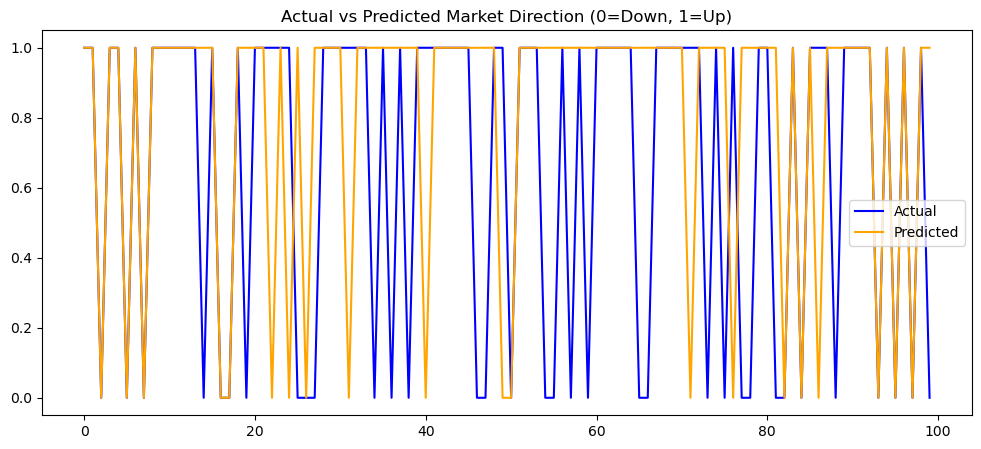

In [158]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:100], label='Actual', color='blue')
plt.plot(y_pred[:100], label='Predicted', color='orange')
plt.title('Actual vs Predicted Market Direction (0=Down, 1=Up)')
plt.legend()
plt.show()

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [163]:

dfc = df2[['Date', 'Price']].copy()
dfc['Date'] = pd.to_datetime(dfc['Date'], errors='coerce')
dfc = dfc.dropna(subset=['Date', 'Price']).sort_values('Date').reset_index(drop=True)


dfc['ret_1']  = dfc['Price'].pct_change(1)
dfc['ma_5']   = dfc['Price'].rolling(5).mean()
dfc['ma_10']  = dfc['Price'].rolling(10).mean()
dfc['vol_5']  = dfc['ret_1'].rolling(5).std()
dfc['lag_price_1'] = dfc['Price'].shift(1)
dfc['target_next_price'] = dfc['Price'].shift(-1)


dfc = dfc.dropna(subset=['ret_1','ma_5','ma_10','vol_5','lag_price_1','target_next_price']).reset_index(drop=True)



In [164]:

X = dfc[['lag_price_1', 'ret_1', 'ma_5', 'ma_10', 'vol_5']]
y = dfc['target_next_price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)




linreg = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
linreg.fit(X_train, y_train)
y_pred_lr = linreg.predict(X_test)


rf = RandomForestRegressor(n_estimators=300, max_depth=8, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)



In [165]:

def report(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{name:20s} | R²: {r2:.4f} | MAE: {mae:.4f}")
    return r2, mae

r2_lr, mae_lr = report("Linear Regression", y_test, y_pred_lr)
r2_rf, mae_rf = report("Random Forest", y_test, y_pred_rf)



Linear Regression    | R²: 0.9590 | MAE: 21.7342
Random Forest        | R²: -2.8758 | MAE: 239.6037


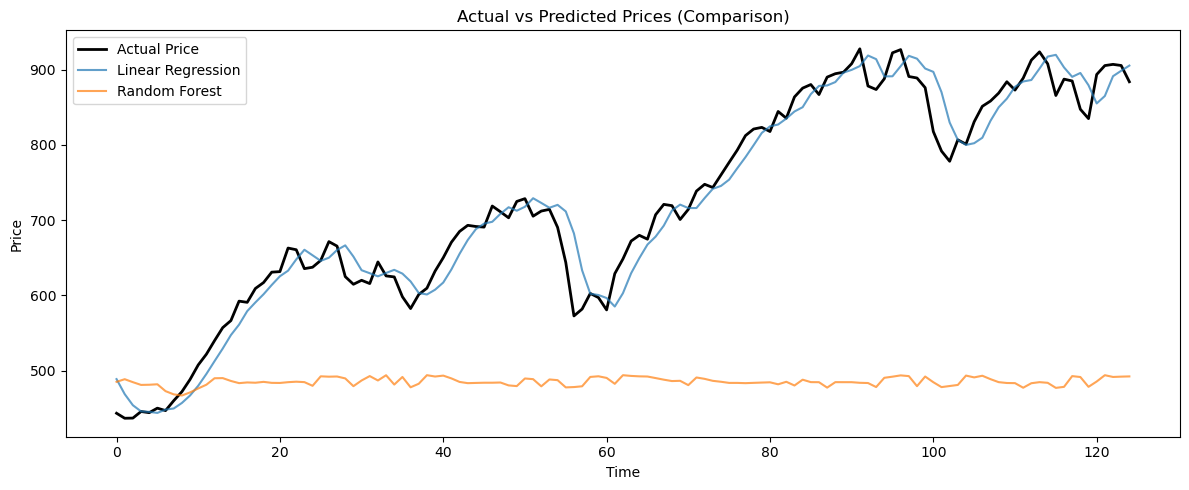

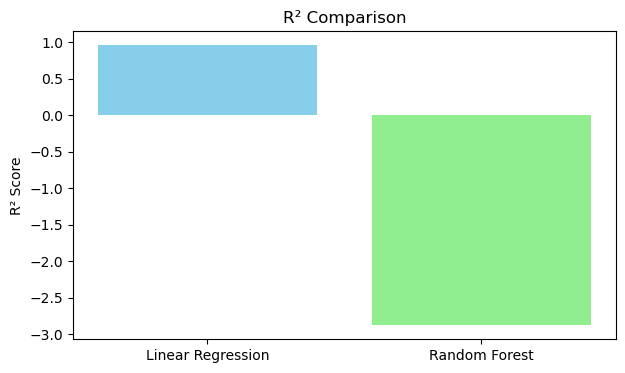

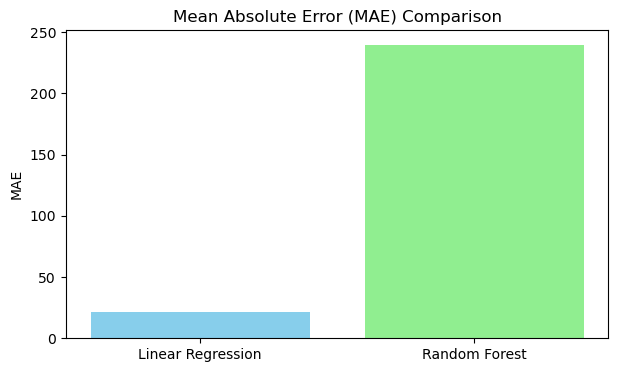

In [166]:

plt.figure(figsize=(12,5))
plt.plot(y_test.values, label="Actual Price", color='black', linewidth=2)
plt.plot(y_pred_lr, label="Linear Regression", alpha=0.7)
plt.plot(y_pred_rf, label="Random Forest", alpha=0.7)
plt.title("Actual vs Predicted Prices (Comparison)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()


models = ["Linear Regression", "Random Forest"]
r2_values = [r2_lr, r2_rf]
mae_values = [mae_lr, mae_rf]

fig, ax1 = plt.subplots(1, 1, figsize=(7,4))
ax1.bar(models, r2_values, color=['skyblue', 'lightgreen'])
ax1.set_title("R² Comparison")
ax1.set_ylabel("R² Score")
plt.show()

fig, ax2 = plt.subplots(1, 1, figsize=(7,4))
ax2.bar(models, mae_values, color=['skyblue', 'lightgreen'])
ax2.set_title("Mean Absolute Error (MAE) Comparison")
ax2.set_ylabel("MAE")
plt.show()

In [167]:
from sklearn import datasets


In [168]:
dfdata = sns.load_dataset("dowjones")
dfdata.head()

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45


In [169]:
df = pd.DataFrame(dfdata.Date , columns = dfdata.Price)

In [170]:
df.head()

Price,55.00,56.55,56.00,58.30,66.45,65.95,68.40,71.85,79.25,85.50,...,834.76,893.37,905.22,906.82,905.32,883.72,922.80,955.47,964.12,965.39


In [171]:
df['Price'] = dfdata['Price']

In [172]:
from sklearn.model_selection import train_test_split as split


In [173]:
X_train , X_test , y_train , y_test = split(dfdata.Price , dfdata.Price , test_size = 0.2)




In [174]:
from sklearn import svm

In [179]:
import numpy as np

if not isinstance(X_train, np.ndarray):
    X_train = X_train.to_numpy()
if not isinstance(X_test, np.ndarray):
    X_test = X_test.to_numpy()
if not isinstance(y_train, np.ndarray):
    y_train = np.ravel(y_train)
if not isinstance(y_test, np.ndarray):
    y_test = np.ravel(y_test)


if X_train.ndim == 1:
    X_train = X_train.reshape(-1, 1)
if X_test.ndim == 1:
    X_test = X_test.reshape(-1, 1)


In [180]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)


if X_train.ndim == 1:
    X_train = X_train.reshape(-1, 1)
if X_test.ndim == 1:
    X_test = X_test.reshape(-1, 1)
y_train = y_train.flatten()
y_test = y_test.flatten()

In [181]:
from sklearn.model_selection import GridSearchCV



In [182]:
srv = GridSearchCV(svm.SVC(gamma = 'auto'),
                   {'C' :[1,10,20],
                    'kernel':['rbf' ,'linear']},
                    cv = 5,return_train_score = False)

In [183]:
X = dfc[['ret_1','ma_5','vol_5']]    
y = dfc['Price']                    



In [184]:
from sklearn.svm import SVR 
pipe = make_pipeline(StandardScaler(), SVR())

param_grid = {'svr__kernel': ['rbf', 'linear'], 
              'svr__C': [0.1, 1, 10, 100], 
              'svr__gamma': ['scale', 'auto']}

grid = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=0)
grid.fit(X_train, y_train)

,estimator,"Pipeline(step...svr', SVR())])"
,param_grid,"{'svr__C': [0.1, 1, ...], 'svr__gamma': ['scale', 'auto'], 'svr__kernel': ['rbf', 'linear']}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [185]:
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVR(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

,estimator,SVR()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'linear'


In [186]:
srv = GridSearchCV(model, param_grid, cv=3, scoring='r2', n_jobs=-1)

In [189]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

In [190]:
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

In [191]:
grid_search.cv_results_

{'mean_fit_time': array([0.00108385, 0.00828385, 0.0006237 , 0.00573945, 0.0005024 ,
        0.00542922, 0.00045662, 0.00534458, 0.00071254, 0.00850444,
        0.00064778, 0.0095192 ]),
 'std_fit_time': array([3.41996472e-04, 1.75079654e-03, 1.02461754e-04, 4.07793719e-04,
        2.00188710e-05, 1.34500320e-04, 2.32989486e-05, 3.63514655e-04,
        1.90951856e-04, 9.57246140e-04, 1.38559230e-04, 1.50043790e-03]),
 'mean_score_time': array([0.00085921, 0.00567489, 0.00061202, 0.0043458 , 0.00049405,
        0.0040956 , 0.00051703, 0.00411634, 0.00066457, 0.00485358,
        0.00068817, 0.00463767]),
 'std_score_time': array([1.34080080e-04, 1.00551961e-03, 6.66561383e-05, 2.93400643e-04,
        5.62465761e-06, 1.43861652e-04, 7.74348310e-05, 3.37990150e-04,
        1.31205156e-04, 4.34260409e-04, 9.34912912e-05, 1.88398319e-04]),
 'param_C': masked_array(data=[0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 10.0, 10.0,
                    10.0, 10.0],
              mask=[False, False, Fals

In [192]:
srv = GridSearchCV(model, param_grid, cv=3, scoring='r2', n_jobs=-1)


srv.fit(X_train, y_train)


best = pd.DataFrame(srv.cv_results_)
print(srv.best_params_)

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [193]:
srv.best_score_

0.9999999194621404